In [3]:
import sys
import os
import glob
import pandas as pd
import numpy as np


#Use the root folder here or copy functions.py to this dir
sys.path.append('/home/bikash/Documents/Solubility/')

import functions

In [6]:
seq = pd.read_pickle('/home/bikash/Documents/Solubility/results/ecoli.pkl.gz')

In [7]:
seq.head()

,Accession,Sequence,ECK number,JW,Solubility(%)
2,JW0002 thrB ECK0003,MRGSHHHHHHTDPALRAMVKVYAPASSANMSVGFDVLGAAVTPVDG...,ECK0003,JW0002,32.0
3,JW0003 thrC ECK0004,MRGSHHHHHHTDPALRAMKLYNLKDHNEQVSFAQAVTQGLGKNQGL...,ECK0004,JW0003,18.0
4,JW0004 yaaX ECK0005,MRGSHHHHHHTDPALRAMKKMQSIVLALSLVLVAPMAAQAAEITLV...,ECK0005,JW0004,78.0
5,JW0005 yaaA ECK0006,MRGSHHHHHHTDPALRAMLILISPAKTLDYQSPLTTTRYTLPELLD...,ECK0006,JW0005,7.0
7,JW0007 talB ECK0008,MRGSHHHHHHTDPALRAMTDKLTSLRQYTTVVADTGDIAAMKLYQP...,ECK0008,JW0007,85.0


In [8]:
path = r'/home/bikash/Documents/Solubility/protr_R_Package_analysis/E_coli/protr_ecoli_W3110' # use your path
all_files = glob.glob(os.path.join(path, '*.txt'))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = [pd.read_csv(f, sep='\t') for f in all_files]


In [9]:
#merge all features

from functools import reduce
all_f = reduce(lambda x,y: pd.merge(x,y, on='Accession', how='outer'), df_from_each_file)


In [10]:
all_f = all_f.rename(columns={'Accession':'JW'})

In [11]:
#merge features with sequence

total = pd.merge(seq, all_f, on="JW", how="outer")

In [12]:
total.dropna(inplace=True)

In [13]:
total.head()

,Accession,Sequence,ECK number,JW,Solubility(%),AAA,RAA,NAA,DAA,CAA,...,Grantham.lag21,Grantham.lag22,Grantham.lag23,Grantham.lag24,Grantham.lag25,Grantham.lag26,Grantham.lag27,Grantham.lag28,Grantham.lag29,Grantham.lag30
0,JW0002 thrB ECK0003,MRGSHHHHHHTDPALRAMVKVYAPASSANMSVGFDVLGAAVTPVDG...,ECK0003,JW0002,32.0,0.0,0.000000,0.000000,0.0,0.0,...,3221285,3500217,3327623,3244796,3241457,3413298,3139704,3171637,3242844,3006789
1,JW0003 thrC ECK0004,MRGSHHHHHHTDPALRAMKLYNLKDHNEQVSFAQAVTQGLGKNQGL...,ECK0004,JW0003,18.0,0.0,0.002232,0.000000,0.0,0.0,...,4402567,4227192,4216894,3748312,4003901,4198377,3946299,3911683,4199487,4320432
2,JW0004 yaaX ECK0005,MRGSHHHHHHTDPALRAMKKMQSIVLALSLVLVAPMAAQAAEITLV...,ECK0005,JW0004,78.0,0.0,0.000000,0.000000,0.0,0.0,...,1074708,969795,953477,917513,836246,990139,909771,883848,889027,938811
3,JW0005 yaaA ECK0006,MRGSHHHHHHTDPALRAMLILISPAKTLDYQSPLTTTRYTLPELLD...,ECK0006,JW0005,7.0,0.0,0.000000,0.003597,0.0,0.0,...,2496055,2540633,2453051,2341848,2459964,2500249,2400842,2495772,2595495,2370518
4,JW0007 talB ECK0008,MRGSHHHHHHTDPALRAMTDKLTSLRQYTTVVADTGDIAAMKLYQP...,ECK0008,JW0007,85.0,0.0,0.002967,0.002967,0.0,0.0,...,3014271,2963456,3369115,2947963,3268055,3108024,2797146,2976679,3135921,2994414


In [14]:
# column we need
# cols = np.append(total.columns[6:], 'Solubility(%)')
cols = total.columns[4:]
# data for doing corr
data = total[cols]

In [15]:
from scipy.stats import spearmanr

d = total[total.columns[4:]]

df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in d.columns:
    y = 'Solubility(%)'
    corr1 = spearmanr(d[x], d[y])
    df_corr.loc[x,y] = corr1[0]
    df_p.loc[x,y] = corr1[1]





/home/bikash/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bikash/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bikash/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/bikash/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/bikash/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [16]:
df_corr.to_pickle('corr.pkl.gz')
df_p.to_pickle('p_val.pkl.gz')

In [17]:
df_corr = pd.read_pickle('corr.pkl.gz')
df_p = pd.read_pickle('p_val.pkl.gz')

In [18]:
df_corr.dropna(inplace=True)
df_corr.head()

,Solubility(%)
Solubility(%),1.000000
AAA,-0.008970
RAA,-0.059586
NAA,-0.041838
DAA,0.027832


In [19]:
df_corr['Solubility(%)'][1:]

AAA              -0.008970
RAA              -0.059586
NAA              -0.041838
DAA               0.027832
CAA              -0.019258
                    ...   
Grantham.lag26   -0.354338
Grantham.lag27   -0.352716
Grantham.lag28   -0.351296
Grantham.lag29   -0.353949
Grantham.lag30   -0.348340
Name: Solubility(%), Length: 9912, dtype: float64

In [20]:
top_feat = pd.Series(df_corr['Solubility(%)'][1:].values, index=df_corr.index[1:])
top_feat.nlargest(1), top_feat.nsmallest(1)



(prop1.G1.residue0    0.350525
 dtype: float64, Xc1.W   -0.401499
 dtype: float64)

## feature Xc1.W has the highest correlation in eSOL data

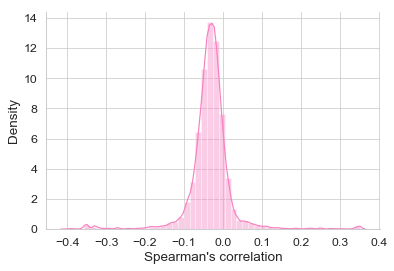

In [22]:
functions.sns.set_palette("Set1_r")
# functions.plt.figure(figsize=(4, 4))
ax = functions.sns.distplot(df_corr['Solubility(%)'][1:])
ax.set(ylabel='Density', xlabel="Spearman's correlation")
functions.sns.despine()
functions.plt.savefig("kde_features_eSOL.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
all_ = pd.concat([df_corr, df_p], axis=1, sort=False)
all_.dropna(inplace=True)
all_.to_csv('corr_and_p.csv')

In [ ]:
all_.shape #(9913, 2)

In [ ]:
functions.plt.figure(figsize=(4, 4))

ax = top_feat.nsmallest(10).plot(kind='barh')
ax.set(xlabel='Correlation')
ax.set(ylabel='')
functions.plt.savefig("top_negative_features_eSOL.pdf", bbox_inches = 'tight', pad_inches = 0)
functions.plt.show()


In [ ]:
functions.plt.figure(figsize=(4, 4))

ax = top_feat.nlargest(10).plot(kind='barh')
ax.set(xlabel='Correlation')
ax.set(ylabel='')
functions.plt.savefig("top_positive_features_eSOL.pdf", bbox_inches = 'tight', pad_inches = 0)
functions.plt.show()
